<a href="https://colab.research.google.com/github/hendrixtlan/tareaManipulacionDatos/blob/main/Actividad8RLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

**Equipo 35**

* A01234567 - José Israel Maldonado Jaramillo
* A01795572 - Al Rashid Martínez Arriola
* A01234567 - Fernando Reyes Veloz

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8"
os.chdir(DIR)

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [43]:
# Estadísticas descriptivas para todas las variables del dataframe
descripcion = insurance_df.describe(include='all')
print(descripcion)

                age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique           NaN  
top              NaN  
freq             NaN  
mean    

**1b**) Búsqueda de valores faltantes.

In [44]:
# Buscar valores faltantes en el DataFrame
valores_faltantes = insurance_df.isnull().sum()
print(valores_faltantes)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

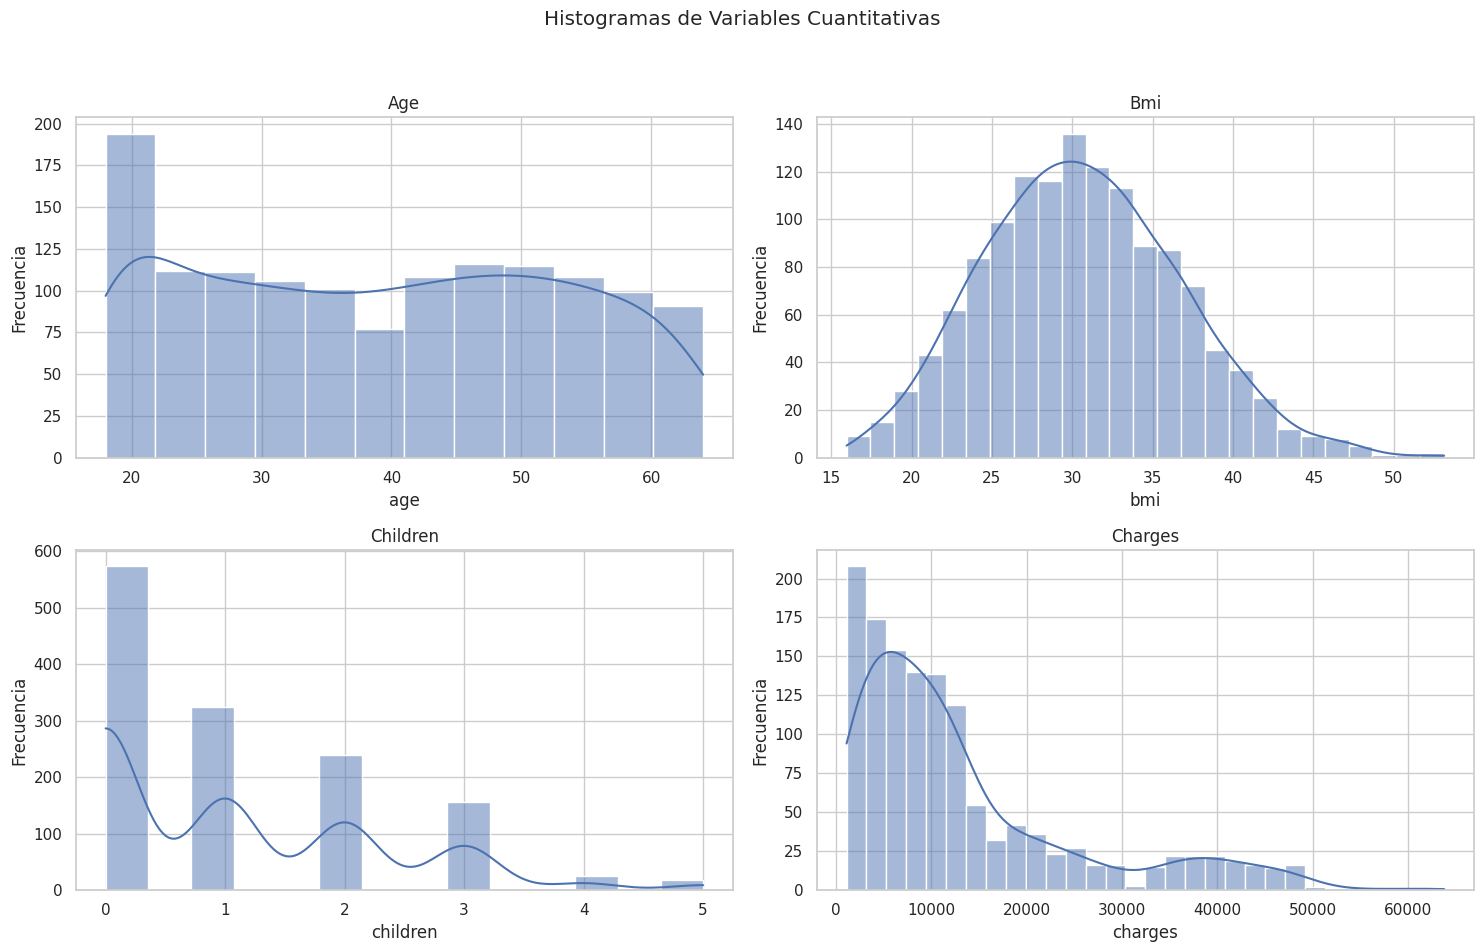

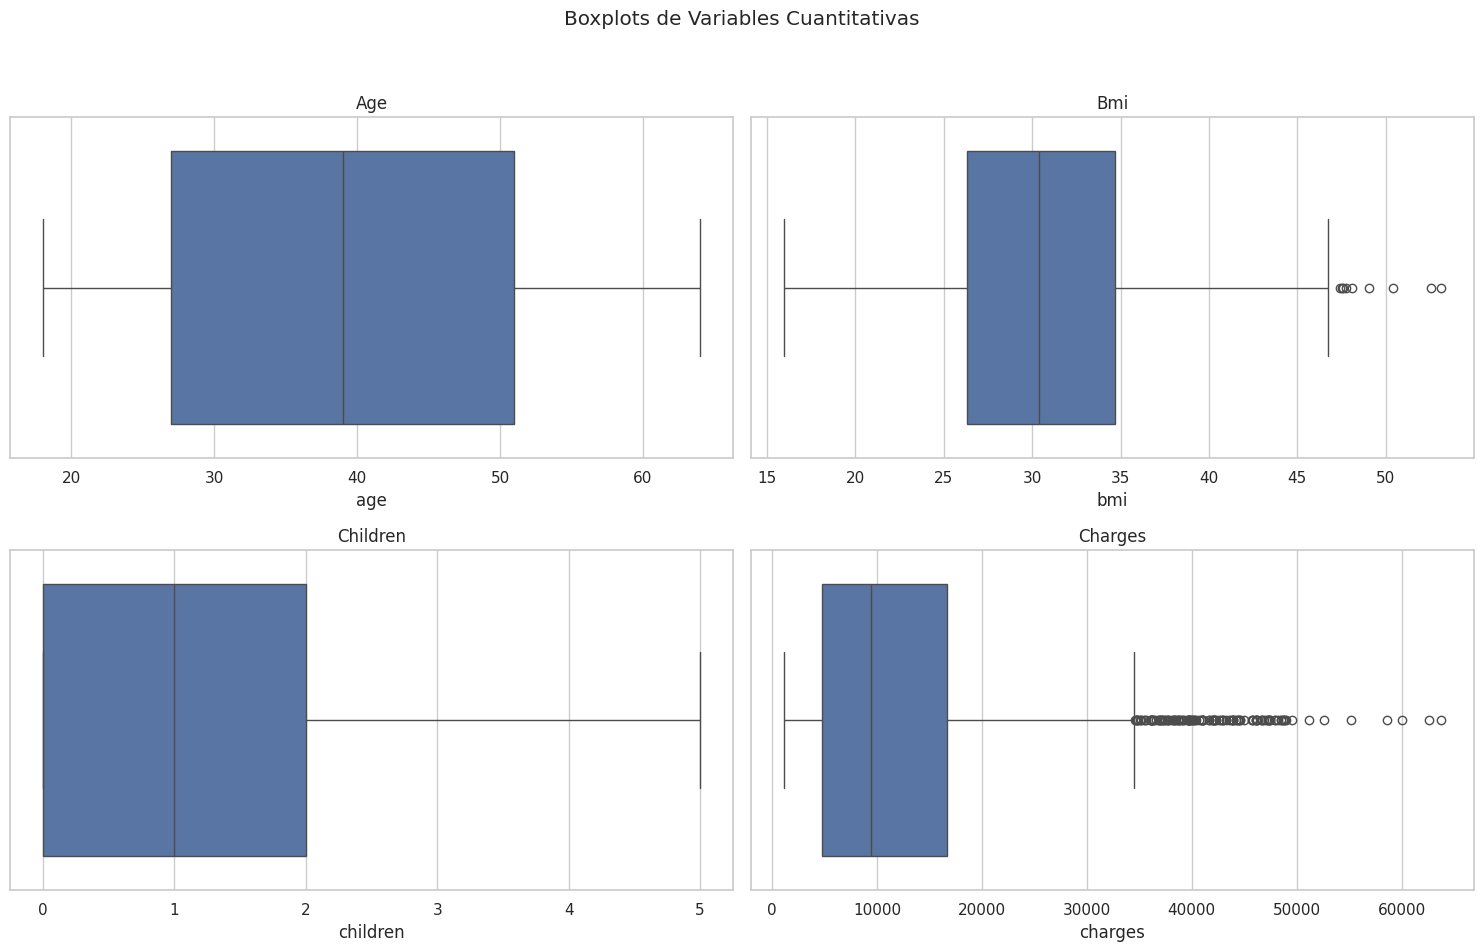

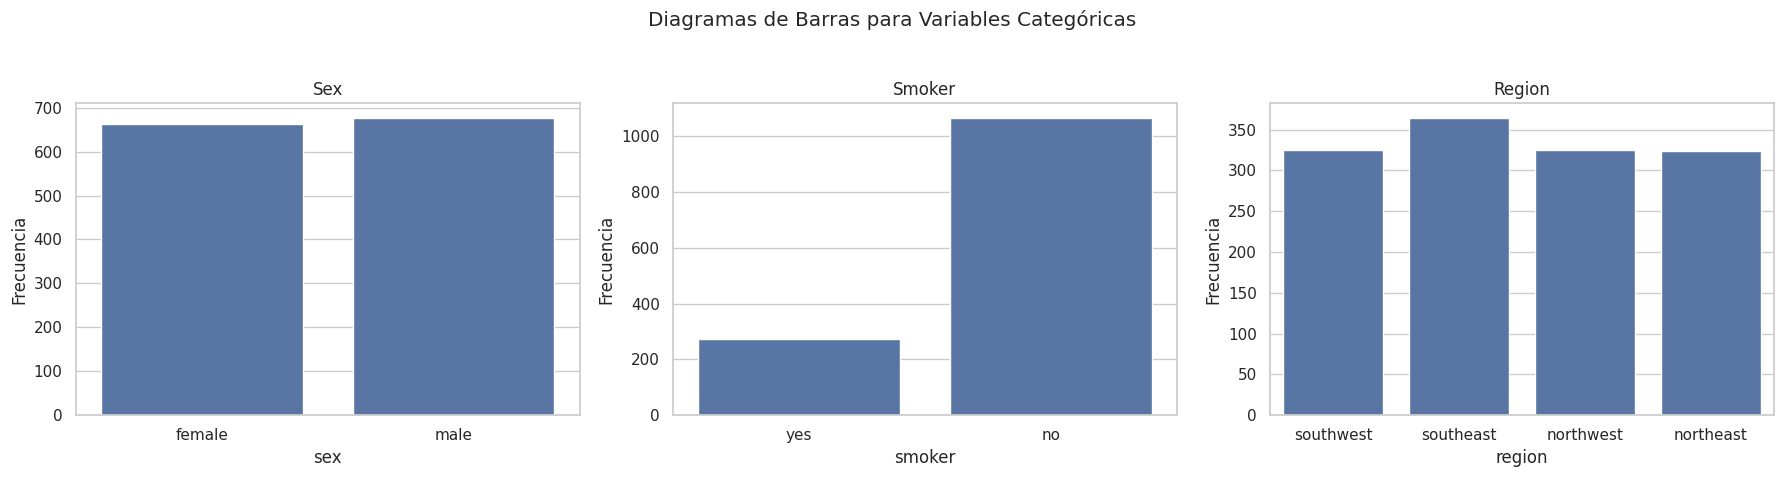

In [45]:
sns.set(style="whitegrid")

# Separar las variables cuantitativas y categóricas
variables_cuantitativas = insurance_df.select_dtypes(include=['int64', 'float64'])
variables_categoricas = insurance_df.select_dtypes(include=['object'])

# Histogramas para variables cuantitativas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Histogramas de Variables Cuantitativas')

for ax, variable in zip(axs.flatten(), variables_cuantitativas):
    sns.histplot(insurance_df[variable], kde=True, ax=ax)
    ax.set_title(variable.capitalize())
    ax.set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Boxplots para variables cuantitativas
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Boxplots de Variables Cuantitativas')

for ax, variable in zip(axs.flatten(), variables_cuantitativas):
    sns.boxplot(x=insurance_df[variable], ax=ax)
    ax.set_title(variable.capitalize())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Variables categóricas
variables_categoricas = ['sex', 'smoker', 'region']

# Diagramas de barras para variables categóricas
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Diagramas de Barras para Variables Categóricas')

for ax, variable in zip(axs.flatten(), variables_categoricas):
    sns.countplot(x=insurance_df[variable], ax=ax)
    ax.set_title(variable.capitalize())
    ax.set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

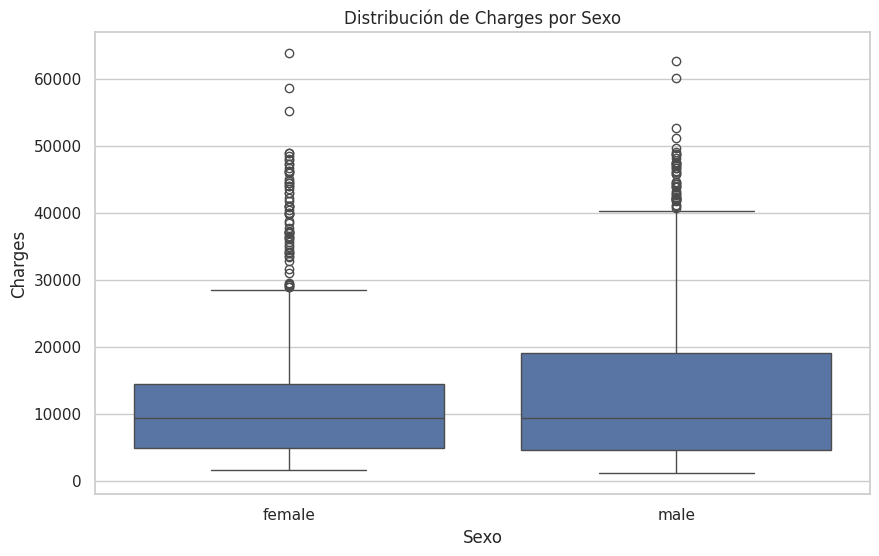

In [46]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='sex', y='charges', data=insurance_df)

# Añadir título y etiquetas
plt.title('Distribución de Charges por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Charges')

# Mostrar el boxplot
plt.show()

¿Hay diferencias significativas de las primas según el sexo?

**Respuesta:** Si, hay diferencias significativas y pueden deberse a ciertos factores como riesgos, historial médico, costos, etc.

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

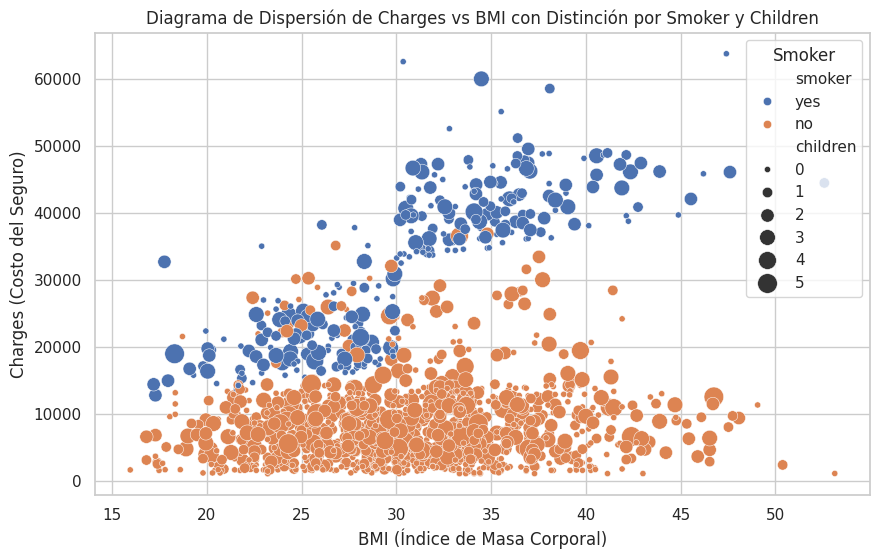

In [47]:
# Crear el diagrama de dispersión con distinción por las categorías smoker y children
plt.figure(figsize=(10, 6))
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(20, 200))
plt.title('Diagrama de Dispersión de Charges vs BMI con Distinción por Smoker y Children')
plt.xlabel('BMI (Índice de Masa Corporal)')
plt.ylabel('Charges (Costo del Seguro)')
plt.legend(title='Smoker')
plt.show()

¿Hay alguna conclusión importante que se derive del gráfico?

**Respuesta:** Definifitavemente hay una conclusión importante pues los resultados en este diagrama nos indica un mayor costo del seguro: a) más alto para fumadores y b) más bajo para personas que no tienen hijos.

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<ipython-input-48-6d51752822c3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = insurance_df.corr()


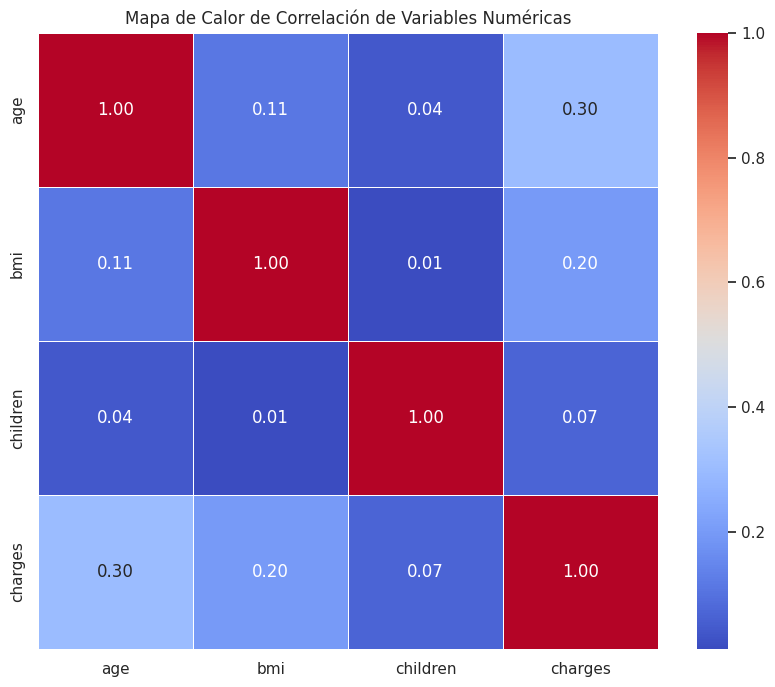

In [48]:
# Calcular la matriz de correlación
corr_matrix = insurance_df.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de Calor de Correlación de Variables Numéricas')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [49]:
# Calcular el rango intercuartílico (IQR)
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites superior e inferior para identificar valores atípicos
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Filtrar las observaciones con valores atípicos en "charges"
observaciones_atipicas = insurance_df[(insurance_df['charges'] < limite_inferior) | (insurance_df['charges'] > limite_superior)]

# Mostrar el DataFrame con las observaciones que tienen valores atípicos en "charges"
print(observaciones_atipicas)

# Calcular el promedio de "age" y "bmi" en el DataFrame resultante
promedio_age_atipico = observaciones_atipicas['age'].mean()
promedio_bmi_atipico = observaciones_atipicas['bmi'].mean()

# Imprimir los resultados
print("Promedio de age en observaciones atípicas:", promedio_age_atipico)
print("Promedio de bmi en observaciones atípicas:", promedio_bmi_atipico)

      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]
Promedio de age en observaciones atípicas: 41.07913669064748
Promedio de bmi en observaciones atípicas: 35.564604316546756


3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [50]:
# Obtener el recuento de observaciones atípicas por género
conteo_genero = observaciones_atipicas['sex'].value_counts()

# Calcular el porcentaje de observaciones atípicas por género
porcentaje_mujeres = (conteo_genero['female'] / len(observaciones_atipicas)) * 100
porcentaje_hombres = (conteo_genero['male'] / len(observaciones_atipicas)) * 100

# Obtener el recuento de observaciones atípicas por hábito de fumar
conteo_fumadores = observaciones_atipicas['smoker'].value_counts()

# Calcular el porcentaje de observaciones atípicas por hábito de fumar
porcentaje_fumadores = (conteo_fumadores['yes'] / len(observaciones_atipicas)) * 100
porcentaje_no_fumadores = (conteo_fumadores['no'] / len(observaciones_atipicas)) * 100

# Imprimir los resultados
print("Porcentaje de observaciones atípicas correspondientes a mujeres:", porcentaje_mujeres)
print("Porcentaje de observaciones atípicas correspondientes a hombres:", porcentaje_hombres)
print("Porcentaje de observaciones atípicas correspondientes a fumadores:", porcentaje_fumadores)
print("Porcentaje de observaciones atípicas correspondientes a no fumadores:", porcentaje_no_fumadores)

Porcentaje de observaciones atípicas correspondientes a mujeres: 35.97122302158273
Porcentaje de observaciones atípicas correspondientes a hombres: 64.02877697841727
Porcentaje de observaciones atípicas correspondientes a fumadores: 97.84172661870504
Porcentaje de observaciones atípicas correspondientes a no fumadores: 2.158273381294964


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [51]:
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

# Mostrar las primeras filas de X para verificar
X.head(), y.head()

(   age     sex     bmi  children smoker     region
 0   19  female  27.900         0    yes  southwest
 1   18    male  33.770         1     no  southeast
 2   28    male  33.000         3     no  southeast
 3   33    male  22.705         0     no  northwest
 4   32    male  28.880         0     no  northwest,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 Name: charges, dtype: float64)

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [52]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba con una estratificación basada en 'smoker'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=X['smoker'])

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1070, 6), (268, 6), (1070,), (268,))

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Identificar las columnas numéricas y categóricas
columnas_numericas = ['age', 'bmi', 'children']
columnas_categoricas = ['sex', 'smoker', 'region']

# Crear el transformador usando ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), columnas_numericas),
        ('cat', OneHotEncoder(), columnas_categoricas)
    ]
)

# si bien el ejercicio no indica que se realice la transformación,
# dejo la referencia como se vió en la sesión 4
# resultado = preprocessing.fit_transform(X_train)



# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
y_pred = preprocessing.fit_transform(X_train)
print(y_train)
lr_model = LinearRegression()
lr_model.fit(y_pred, y_train)
y_pred = y_pred[:, 0]
lr_model_r2 = r2_score(y_pred, y_train)
print(f'R^2 train: {lr_model_r2:.3f}')


42       6272.47720
847      2438.05520
625      3736.46470
394      9411.00500
621     40182.24600
           ...     
56      13607.36875
599     33471.97189
36      15612.19335
1179    19350.36890
597      5594.84550
Name: charges, Length: 1070, dtype: float64
R^2 train: -3547803449.192


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [102]:
# De acuerdo a los resultados de la parte 1 el limite_superior= Q3 + 1.5 * IQR
print("Límite Superior = ", round(limite_superior))
#realizamos el reemplazo de los outliers de los valores de charges que están por arriba del límite superior con el límite superior
insurance_df.loc[insurance_df['charges'] > limite_superior,'charges'] = limite_superior
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=X['smoker'])
lr_model2 = LinearRegression()
y_resultado = preprocessing.fit_transform(X_train)
print(y_resultado)
print(y_train)
y_pred = y_resultado[:, 0]
y_pred = y_pred.reshape(-1, 1)
lr_model2.fit(y_pred, y_train)
#lr_model2.fit(y_train, y_pred)
#print(y_train)
lr_model2_r2 = r2_score(y_train, y_pred)
print(f'R^2 train: {lr_model2_r2:.3f}')
#el valor no  r2_score no está entre 0 y 1 por lo que no es el mejor ajuste


Límite Superior =  34489
[[0.5        0.13672036 0.2        ... 0.         1.         0.        ]
 [0.10869565 0.92427372 0.2        ... 0.         1.         0.        ]
 [0.23913043 0.25375189 0.         ... 1.         0.         0.        ]
 ...
 [0.95652174 0.44471981 0.6        ... 1.         0.         0.        ]
 [0.2826087  0.35784111 0.         ... 0.         1.         0.        ]
 [0.34782609 0.45256781 0.2        ... 0.         0.         0.        ]]
42       6272.477200
847      2438.055200
625      3736.464700
394      9411.005000
621     34489.350562
            ...     
56      13607.368750
599     33471.971890
36      15612.193350
1179    19350.368900
597      5594.845500
Name: charges, Length: 1070, dtype: float64
R^2 train: -1.516


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [103]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

insurance_df.loc[insurance_df['charges'] > limite_superior,'charges'] = limite_superior
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=X['smoker'])

preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OrdinalEncoder(), columnas_categoricas)
    ]
)

resultado2 = preprocessing2.fit_transform(X_train)
print(resultado2)
print(y_train)
y_pred2 = resultado2[:, 0]
y_pred2 = y_pred2.reshape(-1, 1)
lr_model3 = LinearRegression()
lr_model3.fit(y_pred2, y_train)
lr_model3_r2 = r2_score(y_train, y_pred2)
print(lr_model3)
print(f'R^2 train: {lr_model3_r2:.3f}')
#el resultado sigue sin ser el mejor ajuste para la raíz obtenida

[[ 0.13067037 -1.47798028 -0.07452723  1.          0.          2.        ]
 [-1.15271127  3.25565761 -0.07452723  1.          0.          2.        ]
 [-0.72491739 -0.77455507 -0.91393915  0.          0.          1.        ]
 ...
 [ 1.62794896  0.37326936  1.60429663  0.          0.          1.        ]
 [-0.58231943 -0.14892042 -0.91393915  1.          1.          2.        ]
 [-0.36842249  0.42044023 -0.07452723  0.          0.          0.        ]]
42       6272.477200
847      2438.055200
625      3736.464700
394      9411.005000
621     34489.350562
            ...     
56      13607.368750
599     33471.971890
36      15612.193350
1179    19350.368900
597      5594.845500
Name: charges, Length: 1070, dtype: float64
LinearRegression()
R^2 train: -1.516


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [153]:
from sklearn.preprocessing import PolynomialFeatures


insurance_df.loc[insurance_df['charges'] > limite_superior,'charges'] = limite_superior
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, stratify=X['smoker'])

preprocessing3 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), columnas_numericas),
        ('cat', OrdinalEncoder(), columnas_categoricas)
    ]
)

resultado3 = preprocessing3.fit_transform(X_train)
#y_pred3 = resultado3[:, 0]
#y_pred3 = y_pred3.reshape(-1, 1)

pr = PolynomialFeatures(degree = 0)
X_poly = pr.fit_transform(resultado3)


lr_model4 = LinearRegression()
lr_model4.fit(X_poly, y_train)
#print(lr_model4)
lr_model4_r2 = r2_score(y_train, X_poly)
print(f'R^2 train: {lr_model4_r2:.3f}')
#A pesar de haber cambiado a polinomial no obtuvimos mejor ajuste

R^2 train: -1.516
